In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("white")
import glob
import json
import os
import sys
import shutil


In [3]:
def get_corr(x):
    df = pd.read_csv(x)
    model = x.split("_")[0]
    p = df.corr(method="pearson")["truth"][1]
    k = df.corr(method="kendall")["truth"][1]
    s = df.corr(method="spearman")["truth"][1]
    
    return {
        "model": os.path.basename(model),
        "p": p,
        "k": k,
        "s": s
    }
    

dcorr = pd.DataFrame(list(map(get_corr, glob.glob("results/*_predictions.csv")))).sort_values(by="p", ascending=False)
d(dcorr)
print(dcorr.round(3).to_latex(index=False))

# remove the deeper inception v3 model, because it is just used for a comparison
dcorr = dcorr[dcorr["model"] != "deeper"]

,model,p,k,s
7,ResNet152V2,0.837539,0.622268,0.811008
10,DenseNet121,0.823078,0.610508,0.801085
1,DenseNet169,0.821027,0.597712,0.787123
9,ResNet101V2,0.817793,0.601278,0.793927
14,DenseNet201,0.816812,0.595383,0.786015
12,ResNet50V2,0.816461,0.597798,0.791252
15,Xception,0.813942,0.581006,0.767175
0,MobileNet,0.806853,0.586124,0.780256
5,InceptionResNetV2,0.741888,0.527207,0.717077
8,VGG16,0.708031,0.486577,0.675824


\begin{tabular}{lrrr}
\toprule
            model &      p &      k &      s \\
\midrule
      ResNet152V2 &  0.838 &  0.622 &  0.811 \\
      DenseNet121 &  0.823 &  0.611 &  0.801 \\
      DenseNet169 &  0.821 &  0.598 &  0.787 \\
      ResNet101V2 &  0.818 &  0.601 &  0.794 \\
      DenseNet201 &  0.817 &  0.595 &  0.786 \\
       ResNet50V2 &  0.816 &  0.598 &  0.791 \\
         Xception &  0.814 &  0.581 &  0.767 \\
        MobileNet &  0.807 &  0.586 &  0.780 \\
InceptionResNetV2 &  0.742 &  0.527 &  0.717 \\
            VGG16 &  0.708 &  0.487 &  0.676 \\
            VGG19 &  0.671 &  0.470 &  0.661 \\
         ResNet50 &  0.345 &  0.253 &  0.369 \\
        ResNet101 &  0.319 &  0.265 &  0.386 \\
        ResNet152 &  0.207 &  0.213 &  0.318 \\
      MobileNetV2 &  0.052 &  0.030 &  0.044 \\
      InceptionV3 & -0.067 & -0.023 & -0.028 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2640332/3017717864.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dcorr.round(3).to_latex(index=False))


,truth,prediction
0,0.152778,0.160359
1,0.300000,0.339870
2,0.550000,0.590847
3,0.681818,0.603151
4,0.696429,0.719775
...,...,...
369,0.134615,0.225871
370,0.615385,0.508666
371,0.384615,0.350374
372,0.812500,0.704416


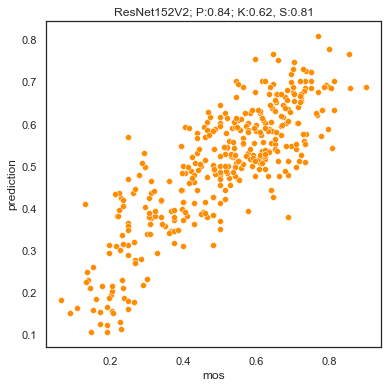

In [3]:
# read best performing model
best_model = dcorr.iloc[0]
best_model_name = best_model["model"]
dbest = pd.read_csv("results/" + best_model_name + "_predictions.csv")

d(dbest)

sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")


ax = sns.scatterplot(x="truth", y="prediction", data=dbest, color="darkorange")
ax.set_xlabel("mos")
ax.set_ylabel("prediction")

ax.set_title(best_model_name + "; P:{}; K:{}, S:{}".format(
        best_model["p"].round(2),
        best_model["k"].round(2),
        best_model["s"].round(2)
    )
)


ax.get_figure().savefig(
    "best_dnn_" + best_model_name + ".pdf", 
    bbox_inches="tight"
)
  